In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("flight.csv",parse_dates=['Date_of_Journey'],)
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


### BASIC INFO ABOUT THE DATA

In [4]:
df.shape

(10683, 11)

In [5]:
df.keys()

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10683 non-null  object        
 1   Date_of_Journey  10683 non-null  datetime64[ns]
 2   Source           10683 non-null  object        
 3   Destination      10683 non-null  object        
 4   Route            10682 non-null  object        
 5   Dep_Time         10683 non-null  object        
 6   Arrival_Time     10683 non-null  object        
 7   Duration         10683 non-null  object        
 8   Total_Stops      10682 non-null  object        
 9   Additional_Info  10683 non-null  object        
 10  Price            10683 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 918.2+ KB


In [7]:
df.dropna(axis=0,inplace=True)

In [8]:
df.shape

(10682, 11)

In [9]:
df.describe(include='all')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
count,10682,10682,10682,10682,10682,10682,10682,10682,10682,10682,10682.000000
unique,12,40,5,6,128,222,1343,368,5,10,NaN
top,Jet Airways,2019-05-18 00:00:00,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info,NaN
freq,3849,504,4536,4536,2376,233,423,550,5625,8344,NaN
first,NaN,2019-01-03 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2019-12-06 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9087.214567
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4611.548810
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1759.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5277.000000


In [10]:
df['Date_of_Journey_year'] = df['Date_of_Journey'].dt.year
df['Date_of_Journey_month'] = df['Date_of_Journey'].dt.month
df['Date_of_Journey_week'] = df['Date_of_Journey'].dt.week
df['Date_of_Journey_day'] = df['Date_of_Journey'].dt.day

In [11]:
df.keys()

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Date_of_Journey_year',
       'Date_of_Journey_month', 'Date_of_Journey_week', 'Date_of_Journey_day'],
      dtype='object')

In [12]:
df.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date_of_Journey_year,Date_of_Journey_month,Date_of_Journey_week,Date_of_Journey_day
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,2019,3,12,24


In [13]:
df["Dep_hour"] = pd.to_datetime(df["Dep_Time"]).dt.hour

# Extracting Minutes
df["Dep_min"] = pd.to_datetime(df["Dep_Time"]).dt.minute

# Now we can drop Dep_Time as it is of no use
df.drop(["Dep_Time"], axis = 1, inplace = True)

In [14]:
#def convert_to_minutes(value):
#    hours, minutes = value.split(':')
#    return int(hours) * 60 + int(minutes)#df['Dep_Time'] = df['Dep_Time'].apply(convert_to_minutes)

In [15]:
def arrival_time(val):
    return val[0:5]

df['Arrival_Time'] = df['Arrival_Time'].apply(arrival_time)

In [16]:
df["Arrival_hour"] = pd.to_datetime(df.Arrival_Time).dt.hour

# Extracting Minutes
df["Arrival_min"] = pd.to_datetime(df.Arrival_Time).dt.minute

# Now we can drop Arrival_Time as it is of no use
df.drop(["Arrival_Time"], axis = 1, inplace = True)

In [17]:
#df['Arrival_Time'] = df['Arrival_Time'].apply(convert_to_minutes)

In [18]:
df['Duration'] = (pd.to_timedelta(df['Duration']).dt.seconds // 60)

In [19]:
df['Duration'].unique()

array([ 170,  445, 1140,  325,  285,  145,  930, 1265,   90,  470,  795,
        155,  135,  730,  270, 1355, 1380, 1235,  310,  920,  175,  800,
        910,  345,  355,  805, 1320,  330,  625,  315,  150,  375,  715,
        665,  510, 1325,  165,  720,  965, 1195,  195,   80,  180,  975,
        905,  390,   65,  745,  200,  615,  630,   85,  440,  810,  300,
       1145,  890,  160, 1330,  575,  600, 1280, 1125,  740, 1080,  555,
       1050,  995,  735,  450,    0,  535,  430,  870,  380,  900,  765,
        610,  925,  845, 1215, 1390, 1090,  960,  140,  480, 1015,  190,
        840, 1430, 1300, 1275,  650,  495,  515,  710,  215,  505, 1255,
        290,  490,   25, 1415,  105,  130,   75,  560,  550,  185,  690,
        570, 1055,  305,  110, 1200,  780, 1105,   10,  295,   95, 1120,
       1165,  320,  545,  645,  700, 1375,  100,  835,  520, 1410,  755,
         15,  660,  675,  875,  775,  540,  460,  705,   55, 1025, 1335,
        880,  435, 1210, 1245,   30, 1225,  335,  8

In [20]:
def total_steps(val):
    if val == 'non-stop':
        return 0
    elif val == '1 stop':
        return 1
    elif val== '2 stops':
        return 2
    else:
        return 3
    
df['Total_Stops'] = df['Total_Stops'].apply(total_steps)

In [21]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date_of_Journey_year,Date_of_Journey_month,Date_of_Journey_week,Date_of_Journey_day,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,170,0,No info,3897,2019,3,12,24,22,20,1,10
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2,No info,7662,2019,1,1,5,5,50,13,15
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2,No info,13882,2019,9,36,6,9,25,4,25
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,325,1,No info,6218,2019,12,49,5,18,5,23,30
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,285,1,No info,13302,2019,1,1,3,16,50,21,35


In [22]:
df['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
Red-eye flight                     1
2 Long layover                     1
1 Short layover                    1
Name: Additional_Info, dtype: int64

In [23]:
df['Route'].value_counts()

DEL → BOM → COK                      2376
BLR → DEL                            1552
CCU → BOM → BLR                       979
CCU → BLR                             724
BOM → HYD                             621
                                     ... 
BOM → RPR → VTZ → HYD                   1
BOM → UDR → DEL → HYD                   1
BLR → CCU → BBI → HYD → VGA → DEL       1
BOM → JDH → JAI → DEL → HYD             1
CCU → IXZ → MAA → BLR                   1
Name: Route, Length: 128, dtype: int64

In [24]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder()  
df['Airline']= label_encoder.fit_transform(df['Airline']) 
df['Source']= label_encoder.fit_transform(df['Source']) 
df['Destination']= label_encoder.fit_transform(df['Destination']) 
df['Route']= label_encoder.fit_transform(df['Route']) 

In [25]:
df.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date_of_Journey_year,Date_of_Journey_month,Date_of_Journey_week,Date_of_Journey_day,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,3,2019-03-24,0,5,18,170,0,No info,3897,2019,3,12,24,22,20,1,10


In [26]:
df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [27]:
def add_info(val):
    if val == 'No info' or val == 'No Info':
        return 0
    elif val == 'In-flight meal not included':
        return 1
    elif val == 'No check-in baggage included':
        return 2
    elif val == '1 Short layover':
        return 3
    elif val == '1 Long layover':
        return 4
    elif val == '2 Long layover':
        return 5
    elif val == 'Change airports':
        return 6
    elif val == 'Business class':
        return 7
    elif val == 'Red-eye flight':
        return 8
    
    
df['Additional_Info'] = df['Additional_Info'].apply(add_info)    

In [28]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date_of_Journey_year,Date_of_Journey_month,Date_of_Journey_week,Date_of_Journey_day,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,3,2019-03-24,0,5,18,170,0,0,3897,2019,3,12,24,22,20,1,10
1,1,2019-01-05,3,0,84,445,2,0,7662,2019,1,1,5,5,50,13,15
2,4,2019-09-06,2,1,118,1140,2,0,13882,2019,9,36,6,9,25,4,25
3,3,2019-12-05,3,0,91,325,1,0,6218,2019,12,49,5,18,5,23,30
4,3,2019-01-03,0,5,29,285,1,0,13302,2019,1,1,3,16,50,21,35


In [29]:
df['Additional_Info'].unique()

array([0, 1, 2, 3, 4, 6, 7, 8, 5], dtype=int64)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Airline                10682 non-null  int32         
 1   Date_of_Journey        10682 non-null  datetime64[ns]
 2   Source                 10682 non-null  int32         
 3   Destination            10682 non-null  int32         
 4   Route                  10682 non-null  int32         
 5   Duration               10682 non-null  int64         
 6   Total_Stops            10682 non-null  int64         
 7   Additional_Info        10682 non-null  int64         
 8   Price                  10682 non-null  int64         
 9   Date_of_Journey_year   10682 non-null  int64         
 10  Date_of_Journey_month  10682 non-null  int64         
 11  Date_of_Journey_week   10682 non-null  int64         
 12  Date_of_Journey_day    10682 non-null  int64         
 13  D

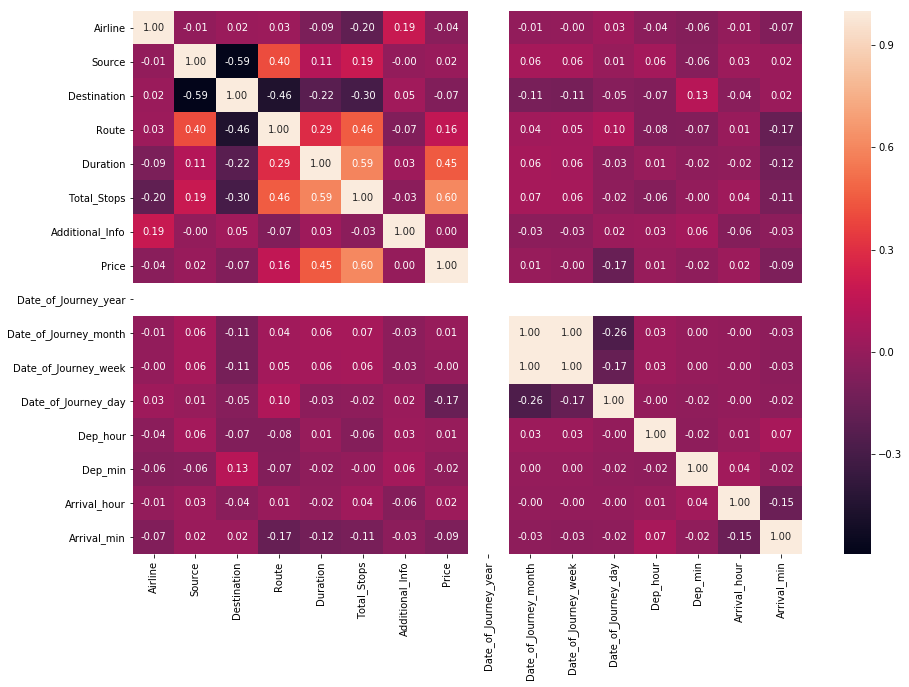

In [31]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, fmt='.2f');

In [32]:
corr_matrix=df.corr()
corr_matrix["Price"].sort_values(ascending=False) 


Price                    1.000000
Total_Stops              0.603970
Duration                 0.449677
Route                    0.164149
Arrival_hour             0.024244
Source                   0.015999
Date_of_Journey_month    0.010705
Dep_hour                 0.006799
Additional_Info          0.003013
Date_of_Journey_week    -0.004530
Dep_min                 -0.024458
Airline                 -0.039565
Destination             -0.071122
Arrival_min             -0.086155
Date_of_Journey_day     -0.165448
Date_of_Journey_year          NaN
Name: Price, dtype: float64

In [33]:
df['Total_Stops'].unique()

array([0, 2, 1, 3], dtype=int64)

In [34]:
df1 = df.drop(['Total_Stops','Date_of_Journey_year','Date_of_Journey','Route','Additional_Info',],axis=1)

In [35]:
X=df1.drop(['Price'],axis=1)
y=df1["Price"]

In [36]:
df1.head()

,Airline,Source,Destination,Duration,Price,Date_of_Journey_month,Date_of_Journey_week,Date_of_Journey_day,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,3,0,5,170,3897,3,12,24,22,20,1,10
1,1,3,0,445,7662,1,1,5,5,50,13,15
2,4,2,1,1140,13882,9,36,6,9,25,4,25
3,3,3,0,325,6218,12,49,5,18,5,23,30
4,3,0,5,285,13302,1,1,3,16,50,21,35


In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.30,random_state=42)

In [52]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression

In [39]:
#from sklearn.linear_model import LogisticRegressionCV
#X, y = load_iris(return_X_y=True)
#clf = LogisticRegressionCV(cv=3, random_state=0).fit(X, y)


In [53]:
from sklearn.ensemble import ExtraTreesRegressor
reg = ExtraTreesRegressor()
reg.fit(X_train, y_train)

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
          oob_score=False, random_state=None, verbose=0, warm_start=False)

In [54]:
pred = reg.predict(X_test)
pred

array([16022.9,  5466.9,  9118.8, ...,  5683.8,  3358.4,  7125.9])

In [55]:
new_df=pd.DataFrame(y_test)
new_df["Predicted_value"]=pred
new_df

,Price,Predicted_value
6075,16655,16022.9
3544,4959,5466.9
9291,9187,9118.8
5032,3858,3597.0
2483,12898,15655.9
...,...,...
7917,16263,14389.3
5858,10844,12962.1
2689,5000,5683.8
4486,3100,3358.4


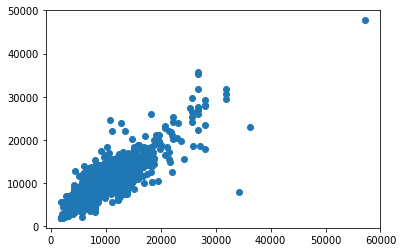

In [56]:
plt.scatter(y_test,pred)

In [57]:
from sklearn import metrics
mae = metrics.mean_absolute_error(y_test, pred)
mse = metrics.mean_squared_error(y_test, pred)
r2 = metrics.r2_score(y_test, pred)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

The model performance for testing set
--------------------------------------
RMSE: 2133.120686699232


In [58]:
reg.score(X_train, y_train)

0.9713643443834209

In [59]:
reg.score(X_test, y_test)

0.7769609215379425

In [49]:
# RMSE/(max(DV)-min(DV))
871.1786/(max(y)-min(y))

0.011204437127827864

In [50]:
metrics.r2_score(y_test, pred)

0.7724252975483422

In [64]:
import pickle
# open a file, where you ant to store the data
file = open("C:\\Users\\Sathya\\Documents\\GC\\flight_", 'wb')

# dump information to that file
pickle.dump(reg, file)